In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Train Data CSV - Day 38.csv',usecols=['Age','Fare','Survived'])

In [14]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [3]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
x_train['age_imputed'] = x_train['Age']
x_test['age_imputed'] = x_test['Age']

In [6]:
x_test.tail()

,Age,Fare,age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [7]:
x_train['age_imputed'][x_train['age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['age_imputed'][x_test['age_imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

/tmp/ipython-input-970210058.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['age_imputed'][x_train['age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
/tmp/ipython-input-970210058.py:2

In [8]:
x_train

,Age,Fare,age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,34.0
493,71.0,49.5042,71.0
527,NaN,221.7792,29.0


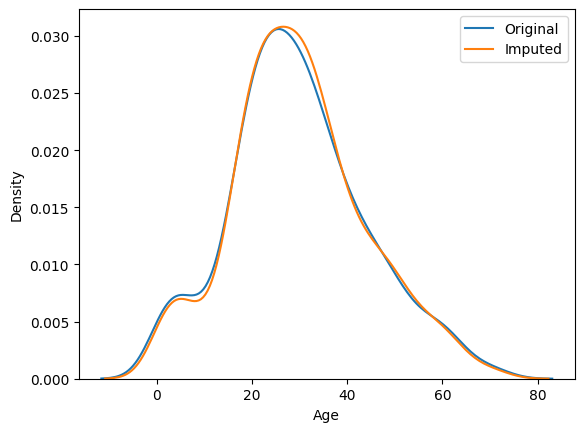

In [9]:
sns.kdeplot(x_train['Age'],label='Original')
sns.kdeplot(x_train['age_imputed'],label='Imputed')

plt.legend()
plt.show()

In [10]:
print("original variable variance:",x_train['Age'].var())
print("imputed variable variance",x_train['age_imputed'].var())

original variable variance: 204.3495133904614
imputed variable variance 195.63197633634377


In [29]:
x_train[['Fare','Age','age_imputed']].cov()

,Fare,Age,age_imputed
Fare,2368.246832,71.512440,54.124516
Age,71.512440,204.349513,204.349513
age_imputed,54.124516,204.349513,201.861184


<Axes: >

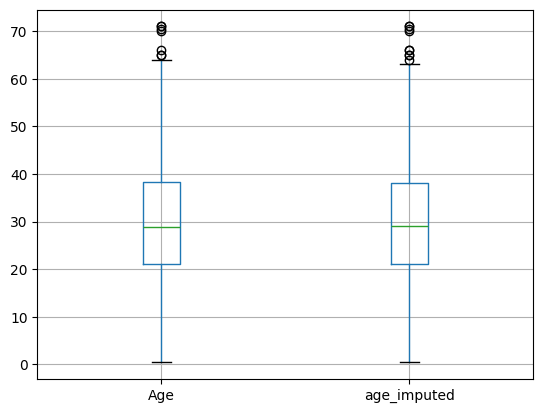

In [11]:
x_train[['Age','age_imputed']].boxplot()

In [13]:
# to avoid getting new random values when the same input is passed again and again
#sampled_value = x_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))